<a href="https://colab.research.google.com/github/amirawaleed556/ML_AIE502/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

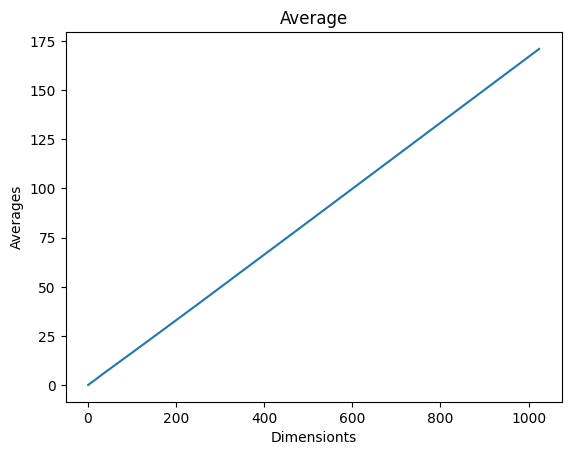

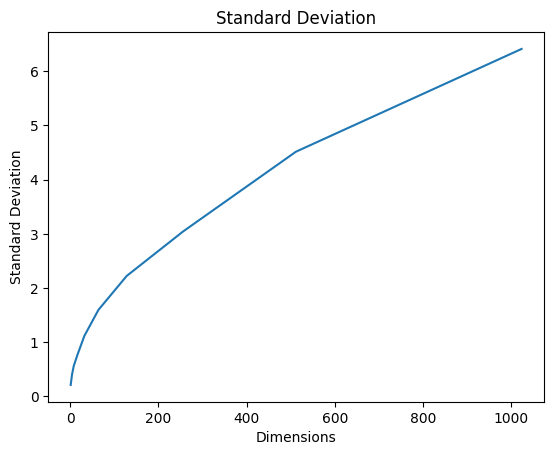

** Topmost **
Topmost(the) Information Gain: 0.0515
** Five more keywords **
['Split with trump Information Gain: 0.0325']
['Split with hillary Information Gain: 0.0373']
['Split with great Information Gain: 0.0001']
['Split with fake Information Gain: 0.0']
['Split with america Information Gain: 0.0096']
** Five more randomly picked keywords **
Split with chants Information Gain: 0.0017
Split with image Information Gain: 0.0
Split with international Information Gain: 0.0
Split with biggest Information Gain: 0.0003
Split with suddenly Information Gain: 0.0003
Split with independence Information Gain: 0.0006
Split with death Information Gain: 0.0012
Split with syrian Information Gain: 0.0
Split with disturbance Information Gain: 0.0
Split with semitism Information Gain: 0.0


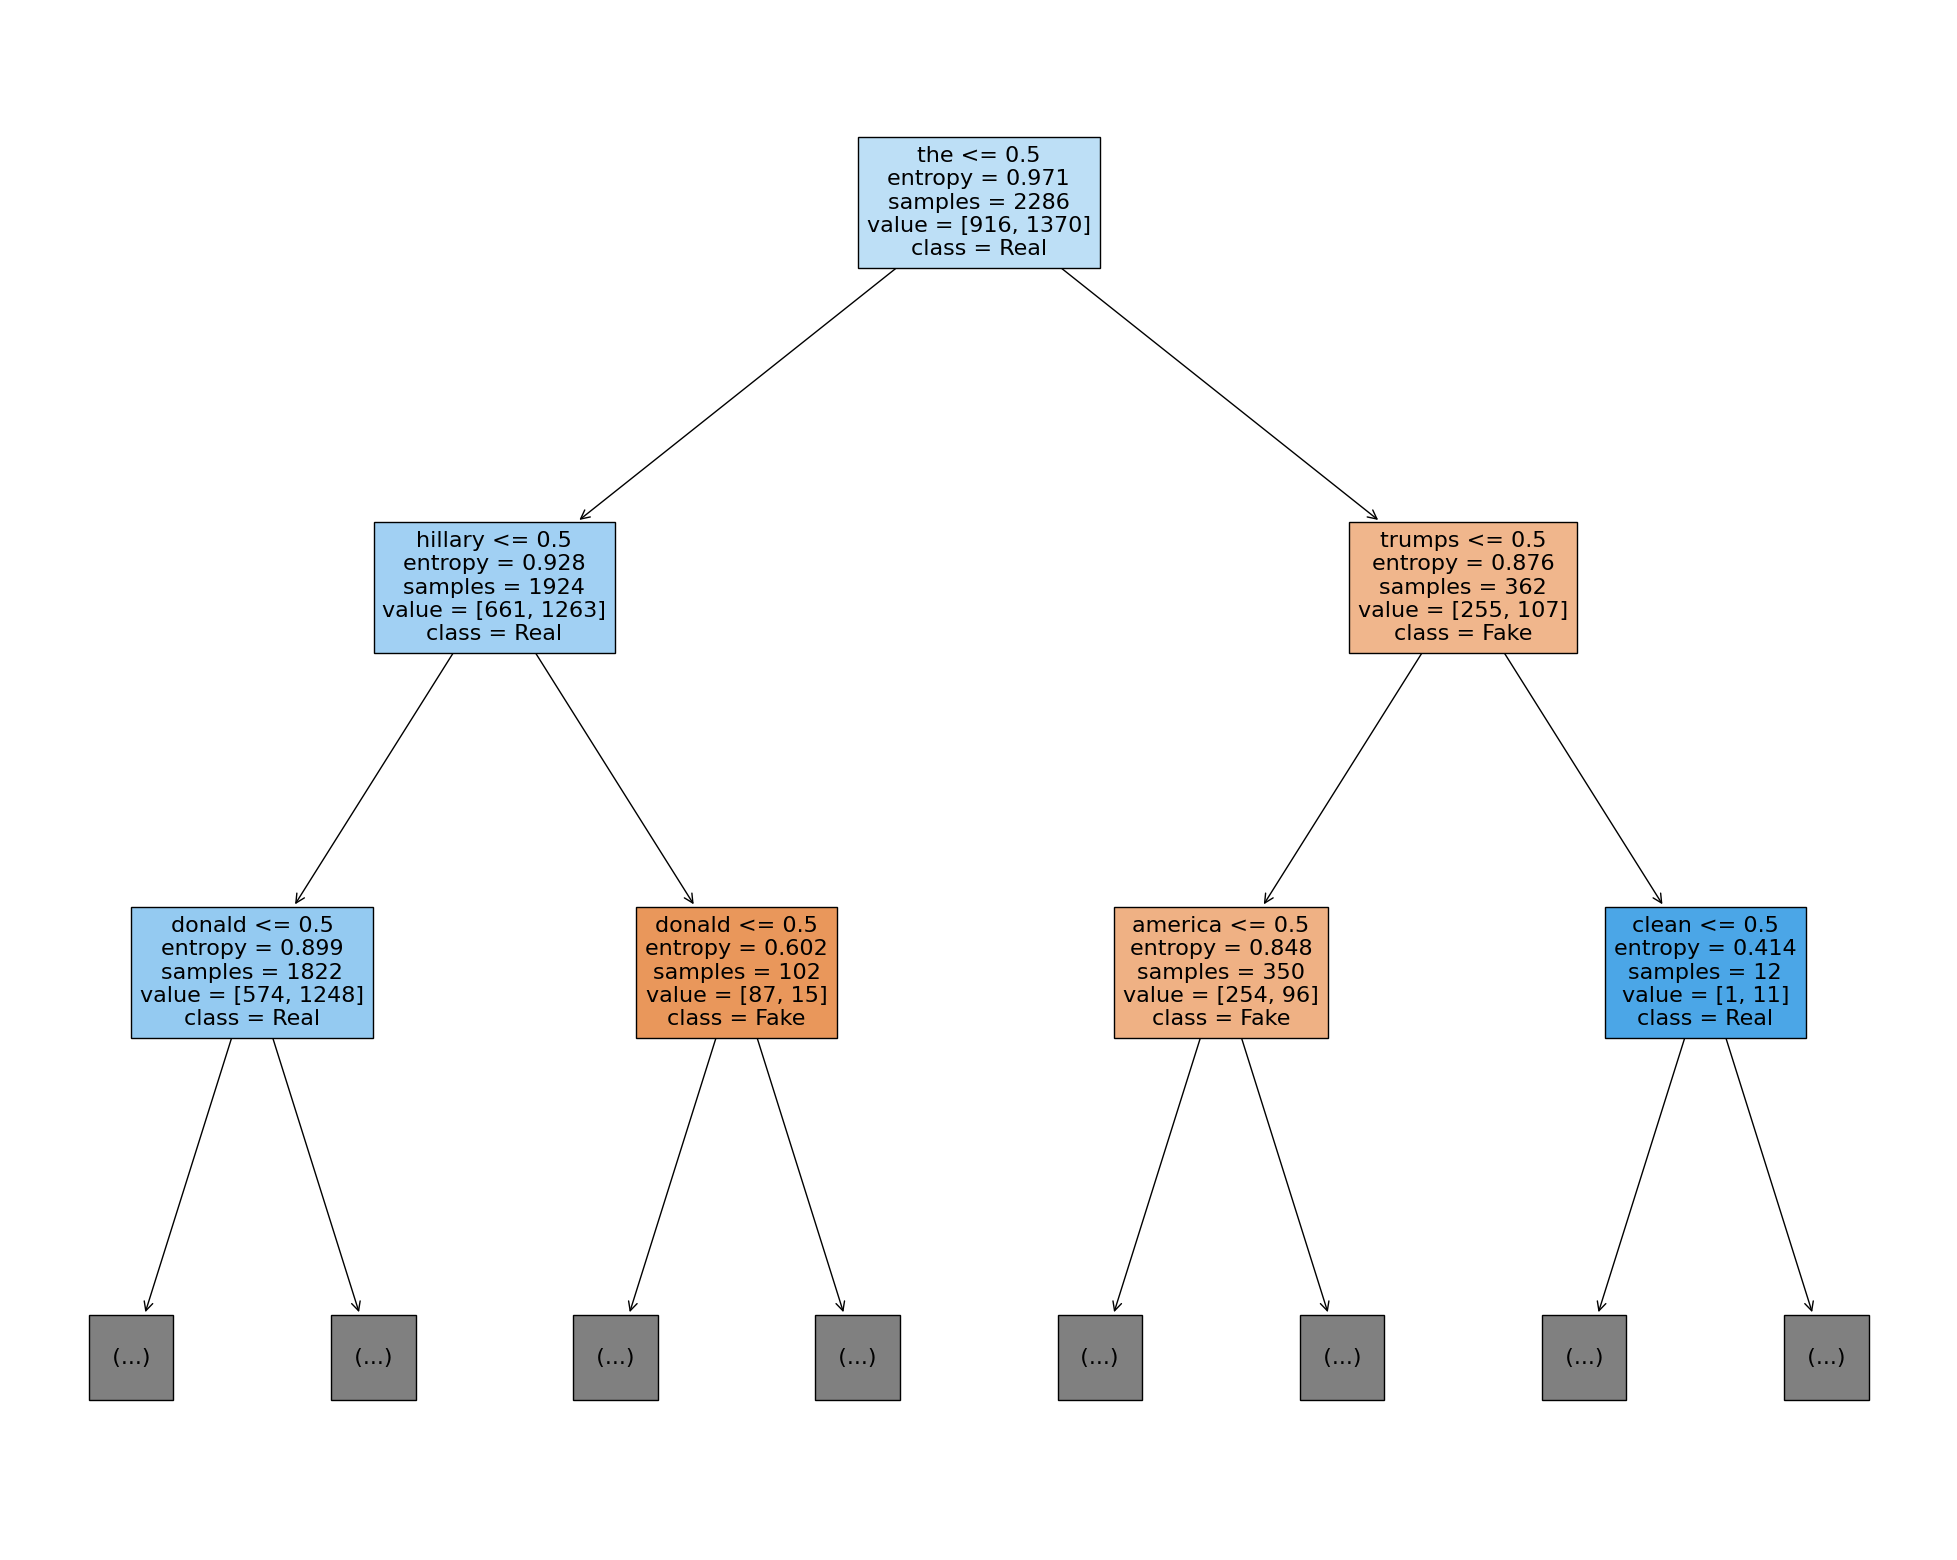

In [1]:
# Assignment1_ML_Toronto2023
# Import all required packages.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import math

# # Q1: Nearest Neighbours and the Curse of Dimensionality

# ## Part 1

np.random.seed(1024)
sample_size = 100

# To store all the averages and standard deviations for the 10 dimensions.
results = {
    "averages": [],
    "standard_deviations": []
}

# For each choice of dimensions from 1 to 1024.
dims = [2**i for i in range(0, 10 + 1)]

for dim in dims:
    samples = np.random.rand(sample_size, dim)
    # To store the distances of the 100 samples from each dimension simulation.
    squared_euclidean_distances = []
    # Use nested loop to make sure each pair is selected.
    for i in range(0, len(samples)):
        sample_1 = samples[i]
        for j in range(i + 1, len(samples)):
            sample_2 = samples[j]
            # Just the formula of the squared euclidean distance for this pair.
            squared_euclidean_distance = sum((sample_1[k] - sample_2[k])**2 for k in range(0, dim))
            squared_euclidean_distances.append(squared_euclidean_distance)

    # Calculat average and standard deviation.
    results['averages'].append(np.mean(squared_euclidean_distances))
    results['standard_deviations'].append(np.std(squared_euclidean_distances))



plt.plot(dims, results['averages'])
plt.title('Average')
plt.xlabel('Dimensionts')
plt.ylabel('Averages')
plt.show()


plt.plot(dims, results['standard_deviations'])
plt.title('Standard Deviation')
plt.xlabel('Dimensions')
plt.ylabel('Standard Deviation')
plt.show()

# %% [markdown]
# # Q2: Decision Trees
# %% [markdown]
# ## Q2a: Load data, Preprocess it, and split it.

# %%
# load_data: two data files, for this assignment, one is fake news, the other is real news.
def load_data(x_data_1, x_data_0):
    x_set = []
    y_set = []

    # Read two text files.
    # Key point is the combined the two text files into one x set, and one y set.
    x_data_1 = open(x_data_1, 'r')
    lines = x_data_1.readlines()
    for line in lines:
        x_set.append(line)
        y_set.append("Fake")
    x_data_0 = open(x_data_0, 'r')
    lines = x_data_0.readlines()
    for line in lines:
        x_set.append(line)
        y_set.append("Real")

    # Read Done, vectorize
    cv = CountVectorizer()
    x_set = cv.fit_transform(x_set)


    # Split. Split is called twice because we want to split it into three sub sets.
    # Still not see the role of testing set in this assignment.
    x_train, x_validation_test, y_train, y_validation_test = train_test_split(x_set, y_set, test_size = 0.3)
    x_validation, x_test, y_validation, y_test = train_test_split(x_validation_test, y_validation_test, test_size = 0.5)
    return x_train, x_validation, x_test, y_train, y_validation, y_test, cv.get_feature_names_out()


# Q2b select_model, train the decision tree, evaluate, print the result.


np.random.seed(1024)
x_train, x_validation, x_test, y_train, y_validation, y_test, feature_names = load_data('clean_fake.txt', 'clean_real.txt')
# Note that I have training dataset, we can start training

# Check accuracy based on how many true values the model catches.
def check_accuracy(predict, actual):
    same_number = 0
    for i in range(0, len(predict)):
        if predict[i] == actual[i]:
            same_number += 1
    return same_number / len(actual)


# Ten combinations.
depths = [1, 2, 4, 8, 16]
criterions = ['gini', 'entropy']

results = []

for depth in depths:
    for criterion in criterions:
        classifier = DecisionTreeClassifier(max_depth = depth, criterion = criterion)
        classifier.fit(x_train, y_train)
        accuracy = check_accuracy(classifier.predict(x_validation), y_validation)

        results.append({
            "max_depth": depth,
            "criterion": criterion,
            "accuracy": accuracy
        })

results


# Q2.c Get the max_depth and criterion of the model that achives the highest validation accuracy, and visualize the first two layers of the tree.

model_with_highest_accuracy = max(results, key=lambda x:x['accuracy'])

classifier = DecisionTreeClassifier(max_depth = model_with_highest_accuracy['max_depth'], criterion = model_with_highest_accuracy['criterion'])
classifier.fit(x_train, y_train)
# text_representation = tree.export_text(classifier, max_depth = 2)
# print(text_representation)

# tree.plot_tree(classifier)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier, filled=True, max_depth = 2, class_names = classifier.classes_, feature_names = feature_names)

# ## Q2d: Compute the information gain.

# %%
# left_fake = 2
# left_real = 0
# right_fake = 3
# right_real = 2

# Calculate H
def get_h(y1, y2):
    p_y1 = y1 / (y1 + y2) if y1 + y2 != 0 else 0
    p_y2 = y2 / (y1 + y2) if y1 + y2 != 0 else 0
    log1 = math.log(p_y1, 2) if p_y1 != 0 else 0
    log2 = math.log(p_y2, 2) if p_y2 != 0 else 0
    return -p_y1 * log1 - p_y2 *log2

# Calculate IG
def compute_information_gain(left_fake, left_real, right_fake, right_real):
    h_y = get_h(left_fake + right_fake, left_real + right_real)
    h_y_if_left = get_h(left_fake, left_real)
    h_y_if_right = get_h(right_fake, right_real)

    p_left = (left_fake + left_real) / (left_fake + left_real + right_fake + right_real)
    p_right = (right_fake + right_real) / (left_fake + left_real + right_fake + right_real)

    IG = h_y - p_left * h_y_if_left - p_right * h_y_if_right
    return IG

# compute_information_gain(left_fake, left_real, right_fake, right_real)


# Now we need to get
np.random.seed(1024)

index = classifier.tree_.feature[0]

def get_split_information_gain(x_train, y_train, feature_index):
    texts = x_train.toarray()
    left_fake, left_real, right_fake, right_real = 0, 0, 0, 0
    for i in range(0, len(texts)):
        text = texts[i]
        result = y_train[i]
        # Judged by if the word appears in the title.
        if text[feature_index] <= 0.5 and result == "Fake":
            left_fake += 1
        elif text[feature_index] <= 0.5 and result == "Real":
            left_real += 1
        elif text[feature_index] > 0.5 and result == "Fake":
            right_fake += 1
        elif text[feature_index] > 0.5 and result == "Real":
            right_real += 1

    return round(compute_information_gain(left_fake, left_real, right_fake, right_real), 4)


print("** Topmost **")
print("Topmost(" + feature_names[index] + ") Information Gain: " + str(get_split_information_gain(x_train, y_train, index)))


# five more
five_more = ['trump', 'hillary', 'great', 'fake', 'america']

print("** Five more keywords **")
for one_in_five_more in five_more:
    this_index = np.where(feature_names == one_in_five_more)
    print("Split with " + feature_names[this_index] + " Information Gain: " + str(get_split_information_gain(x_train, y_train, this_index)))


# Now get ten more splits!
print("** Five more randomly picked keywords **")
for i in range(0, 10):
    random_index = np.random.randint(0, len(feature_names))
    print("Split with " + feature_names[random_index] + " Information Gain: " + str(get_split_information_gain(x_train, y_train, random_index)))